# 1)Python program for customer segmentation with sample input and outputs 



In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from collections import defaultdict
import matplotlib.cm as cm
import csv

In [2]:
pdataset=pd.read_csv('pizza_customers.csv')
pdataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Steps to form a cluster

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from collections import defaultdict
import matplotlib.cm as cm
import csv

dataset=pd.read_csv('pizza_customers.csv')
X = dataset.iloc[:, [3, 4]].values

K=5
m=200
Centroids=np.array([]).reshape(2,0)

#step 1
#Initialize the centroids randomly from the data points:
#Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.

for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    
#step2
# For each training example compute the euclidian distance from the centroid and assign the cluster based on the minimal distance
#The output of our algorithm should be a dictionary with cluster number as Keys and the data points which belong to that cluster as values. So let’s initialize the dictionary.

num_iter=100
Output=defaultdict()
Output={}

for n in range(num_iter):
    #step 2.a
    #We find the euclidian distance from each point to all the centroids and store in a m X K matrix. 
    #So every row in EuclidianDistance matrix will have distances of that particular data point from all the centroids. 
    #Next, we shall find the minimum distance and store the index of the column in a vector C.
    
    EuclidianDistance=np.array([], dtype='int16').reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    C=np.argmin(EuclidianDistance,axis=1)+1
    #step 2.b
    #We need to regroup the data points based on the cluster index C and store in the Output dictionary and 
    #also compute the mean of separated clusters and assign it as new centroids. 
    #Y is a temporary dictionary which stores the solution for one particular iteration.
    Y={}
    for k in range(K):
        Y[k+1]=np.array([], dtype='int16').reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
        
        
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
        
    Output=Y
           
print(Output)        


{1: array([[15, 81],
       [16, 77],
       [17, 76],
       [18, 94],
       [19, 72],
       [19, 99],
       [20, 77],
       [20, 79],
       [21, 66],
       [23, 98],
       [24, 73],
       [25, 73],
       [28, 82],
       [28, 61],
       [29, 87],
       [30, 73],
       [33, 92],
       [33, 81],
       [34, 73],
       [37, 75],
       [38, 92],
       [39, 65]], dtype=int64), 2: array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 72,  34],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  2

# Visualization of cluster

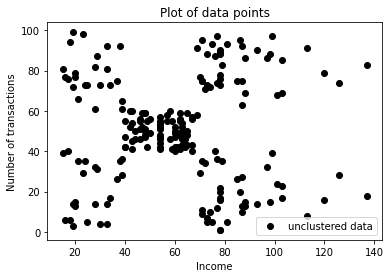

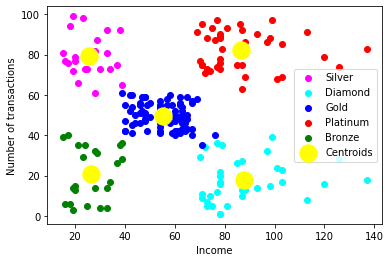

Cluster 1 are a Silver customers contains 21 Datapoints
Cluster 2 are a Bronze customers contains 35 Datapoints
Cluster 3 are a Diamond customers contains 79 Datapoints
Cluster 4 are a Platinum customers contains 38 Datapoints
Cluster 5 are a Gold customers contains 22 Datapoints


In [6]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

# Visualising the clusters
color=['magenta','cyan','blue','red','green']
labels=['Silver','Diamond','Gold','Platinum','Bronze']
k=0
K=5
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
    #print(Centroids[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()


cluster = ''
header = ['Anual Income', 'Spending Score', 'Offer']
with open('Offer.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    #print(Output)
    for i in Output:
        for j in range(len(Output[i])):
            if(i == 1):
                cluster = "Silver" #Silver Customer
                #print("Cluster 1 are a Silver customers contains " + str(datapoints) + " Datapoints")
            elif(i == 2):
                cluster = "Bronze" #Bronze Customer
                
            elif(i == 3):    
                cluster = "Diamond" #Diamond Customer
                
            elif(i == 4): 
                cluster = "Platinum" #Platinum Customer
                
            elif(i == 5):
                cluster = "Gold" #Gold Customer
            datapoints=j    
            data= [Output[i][j][0],Output[i][j][1], cluster]
            writer.writerow(data)
        print("Cluster "+str(i)+" are a "+cluster+" customers contains " + str(datapoints) + " Datapoints")


# 2)	Short note on criteria used for cluster nomenclature
1. Customers with low income but a High number of transactions --> Magenta  --> Cluster 1 --> Silver Customer

2. Customers with low income and a low number of transactions--> Green --> Cluster 5 -->Bronze customer

3. Customers with medium income and a medium number of transactions -->  Blue --> Cluster 5 --> Gold Customer

4. Customers with High income and a low number of transactions --> Cyan --> Cluster 3 -->Diamond Customer

5. Customers with High income and a High number of transactions --> Red -->  Cluster 4 -->Platinum



On basis of available data, we have divided our customer base in 5 categories

1.Bronze

    a.This category represents customer having low income and low transaction frequency record.
    b.We plan to give them our premium 25% discount
    c.15% discount rate enabled them to be promoted to Silver tier
    d.Giving them 25% discount will make more chances of them frequently order from our restaurant since their spending capacity is low because of low income
    e.Giving attractive discount of 25% will encourage them to spend and get upgraded to Silver tier 
    f.Our main target would be to convert all Bronze customers to Silver tier
    
2.Silver

    a.This category represents customers who have low income but have high transaction frequency record.
    b.We encourage them to give 5% discount as they are already under high transaction, and higher discount won’t affect the business much as their income is less
    c.So giving those customers higher discount won’t benefit the business as they are already our frequent customers
    d.For Low income customers Silver tier is ideal tier since their spending capacity is quite low
    
3.Gold

    a.This category represents customers who have medium level income and transaction frequency
    b.We plan to give them 15% discount
    c.Our main focus for this tier is to increase their transaction frequency to a larger extent
    d.For gold tier users, their spending capacity can be considered as average
    e.Thus 15% discount rate can be considered as an average rate in order to promote them to order more from our restaurant
    f.This tier cannot be promoted to other tier as their income capacity comes under average range
    
4.Diamond

    a.This category represents customers having high income but low transaction frequency
    b.We plan to give them our premium 25% discount rate
    c.Consumers in this tier have the capacity to spend, but by giving premium discount price will attract them to purchase more from our restaurant
    d.Our target is to make them familiar and used to our restaurant thus promoting Diamond tier to Platinum tier
    e.Diamond tier is the most important tier of all in terms of increasing revenue as they have the spending capacity
    f.Thus by giving them our premium 25% discount rate will leverage them to purchase more thus increasing our transaction frequency
    
5.Platinum
 
    a.This category of customers represent high level income with high transaction frequency.
    b.We plan to give them least discount rate of 5%
    c.Since these customers already have good transaction frequency with good spending capacity, we don’t need to give them more discount
    d.This tier is considered to be most revenue generated tier
    e.In order to preserve customers of this tier, we need to make sure we have consistent service and quality of our restaurant

# Elbow Method
we use a method called ELBOW method to find the appropriate number of clusters. The parameter which will be taken into consideration is Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares).

In [5]:
import numpy as np
import random as rd
class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]
        
    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""
        
        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss
        

In [6]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

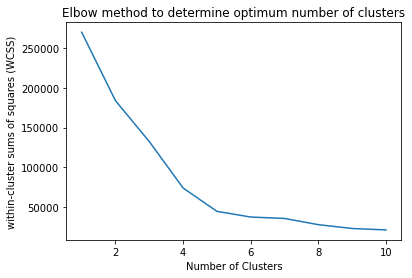

In [70]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

Now if we observe the point after which there isn’t a sudden change in WCSS is K=5. So we choose K=5 as an appropriate number of clusters. 
